# importing required packages and librarie's:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("D:/Datasets/startup_funding_dataset.csv")

df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


# perform basic analysis:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [5]:
# according to basic information about the dataset following steps to follow:
# data has a  3044 records
# there are missing values in the varius coloumns like industry vertical, subvertical, location,investors name we need to clean it
# Amount in USD in on object we need to change it on int or float formate:

# remove coloums that has a no impact of prediction:

In [6]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [7]:
df.drop(columns =["Sr No", "Remarks", "Date dd/mm/yyyy"], inplace = True)

In [8]:
df

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
...,...,...,...,...,...,...,...
3039,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3040,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3041,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"
3042,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN


In [9]:
# re-name the columns

df.rename(columns = {"SubVertical" : "Sub Vertical" , "City Location" : "City Location", "InvestmentType" : "Investment Type"}, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Startup Name       3044 non-null   object
 1   Industry Vertical  2873 non-null   object
 2   Sub Vertical       2108 non-null   object
 3   City  Location     2864 non-null   object
 4   Investors Name     3020 non-null   object
 5   InvestmentnType    3040 non-null   object
 6   Amount in USD      2084 non-null   object
dtypes: object(7)
memory usage: 166.6+ KB


In [11]:
# change data types of amount in USD

df["Funded Amount"] = df["Amount in USD"].replace(",", "",regex=True)

In [12]:
# let's drop the Amount in USD

df.drop(columns = ["Amount in USD"], inplace = True, axis = 1)

In [15]:
# replace 960 missing values to 0

df["Funded Amount"].fillna("0", inplace = True)

# There is a value "Undisclosed" in the FundedAmount which has to be replaced with 0 for string to float operation work:

In [27]:
df.replace(to_replace = 'undisclosed', value = "0", inplace = True)
df.replace(to_replace = 'unknown', value = "0", inplace = True)

In [28]:
df["Funded Amount"] = df["Funded Amount"].replace('\+','', regex = True)
df["Funded Amount"] = df["Funded Amount"].replace('[^A-Za-z0-9]+','', regex = True)
df["Funded Amount"] = df["Funded Amount"].replace('xc2xa0','', regex = True)
df["Funded Amount"] = df["Funded Amount"].replace('NA','0', regex = True)

# now we chage the data types in funded amount column:

In [31]:
df["Funded Amount"] = df["Funded Amount"].replace('Undisclosed', np.nan).astype(float)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Startup Name       3044 non-null   object 
 1   Industry Vertical  2873 non-null   object 
 2   Sub Vertical       2108 non-null   object 
 3   City  Location     2864 non-null   object 
 4   Investors Name     3020 non-null   object 
 5   InvestmentnType    3040 non-null   object 
 6   Funded Amount      3044 non-null   float64
dtypes: float64(1), object(6)
memory usage: 166.6+ KB


In [33]:
# checking null values in each column:
df.isnull().sum()

Startup Name           0
Industry Vertical    171
Sub Vertical         936
City  Location       180
Investors Name        24
InvestmentnType        4
Funded Amount          0
dtype: int64

In [34]:
# in above we can see that lot of missing values in critical columns. So lets re-analyse that and rectify the null values


In [39]:
# clean the investors name 

df["Investors Name"].fillna("other Investors", inplace = True)
df.isnull().sum()

Startup Name           0
Industry Vertical    171
Sub Vertical         936
City  Location       180
Investors Name         0
InvestmentnType        4
Funded Amount          0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2098 entries, 0 to 2107
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Startup Name       2098 non-null   object 
 1   Industry Vertical  2098 non-null   object 
 2   Sub Vertical       2098 non-null   object 
 3   City  Location     2098 non-null   object 
 4   Investors Name     2098 non-null   object 
 5   InvestmentnType    2098 non-null   object 
 6   Funded Amount      2098 non-null   float64
dtypes: float64(1), object(6)
memory usage: 131.1+ KB


# data aggrigation:

In [50]:
df.groupby('City  Location').max().reset_index()

,City Location,Startup Name,Industry Vertical,Sub Vertical,Investors Name,InvestmentnType,Funded Amount
0,Agra,Shoekonnect,eCommerce,Footwear & Leather B2B App,Indian Angels Network,Seed Funding,0.0
1,Ahemadabad,Infibeam,E-Commerce,Online Retailing,other Investors,Seed/ Angel Funding,6230000.0
2,Ahemdabad,Foodmemories,Consumer Internet,Online Food Marketplace,"Bhavesh Manglani, Suraj Saharan, Darshan Upadh...",Seed funding,0.0
3,Ahmedabad,eSwasthya,eCommerce,waterless car washing solution,"hooting Starts Sports LLP, Franchise India Brands",Seed Funding,32000000.0
4,Amritsar,eBikeGo,Last Mile Transportation,Electric bike rental,Startup Buddy,Seed,300000.0
...,...,...,...,...,...,...,...
79,Udaipur,Karma Healthcare,Healthcare,Technology enabled equitable healthcare for India,"1Crowd, Ankur Capital",Seed / Angel Funding,500000.0
80,Udupi,99Games,Technology,Mobile Game Developer Studio,Dream Incubator,Seed Funding,0.0
81,Uttar Pradesh,IGP.com,E-Commerce,Online Gifting Platform,Venture Catalysts,Private Equity,0.0
82,Vadodara,PurpleDocs,Technology,Taxi Rental Platform,Undisclosed investors,Seed Funding,1000000.0


# EDA:

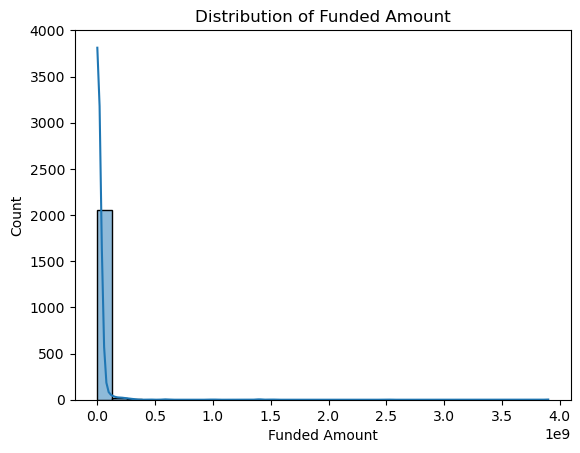

In [56]:
# Visualize distribution of target Histogram wth (kernel density estimate) 

sns.histplot(df["Funded Amount"], bins=30, kde=True)
plt.title("Distribution of Funded Amount")
plt.show()


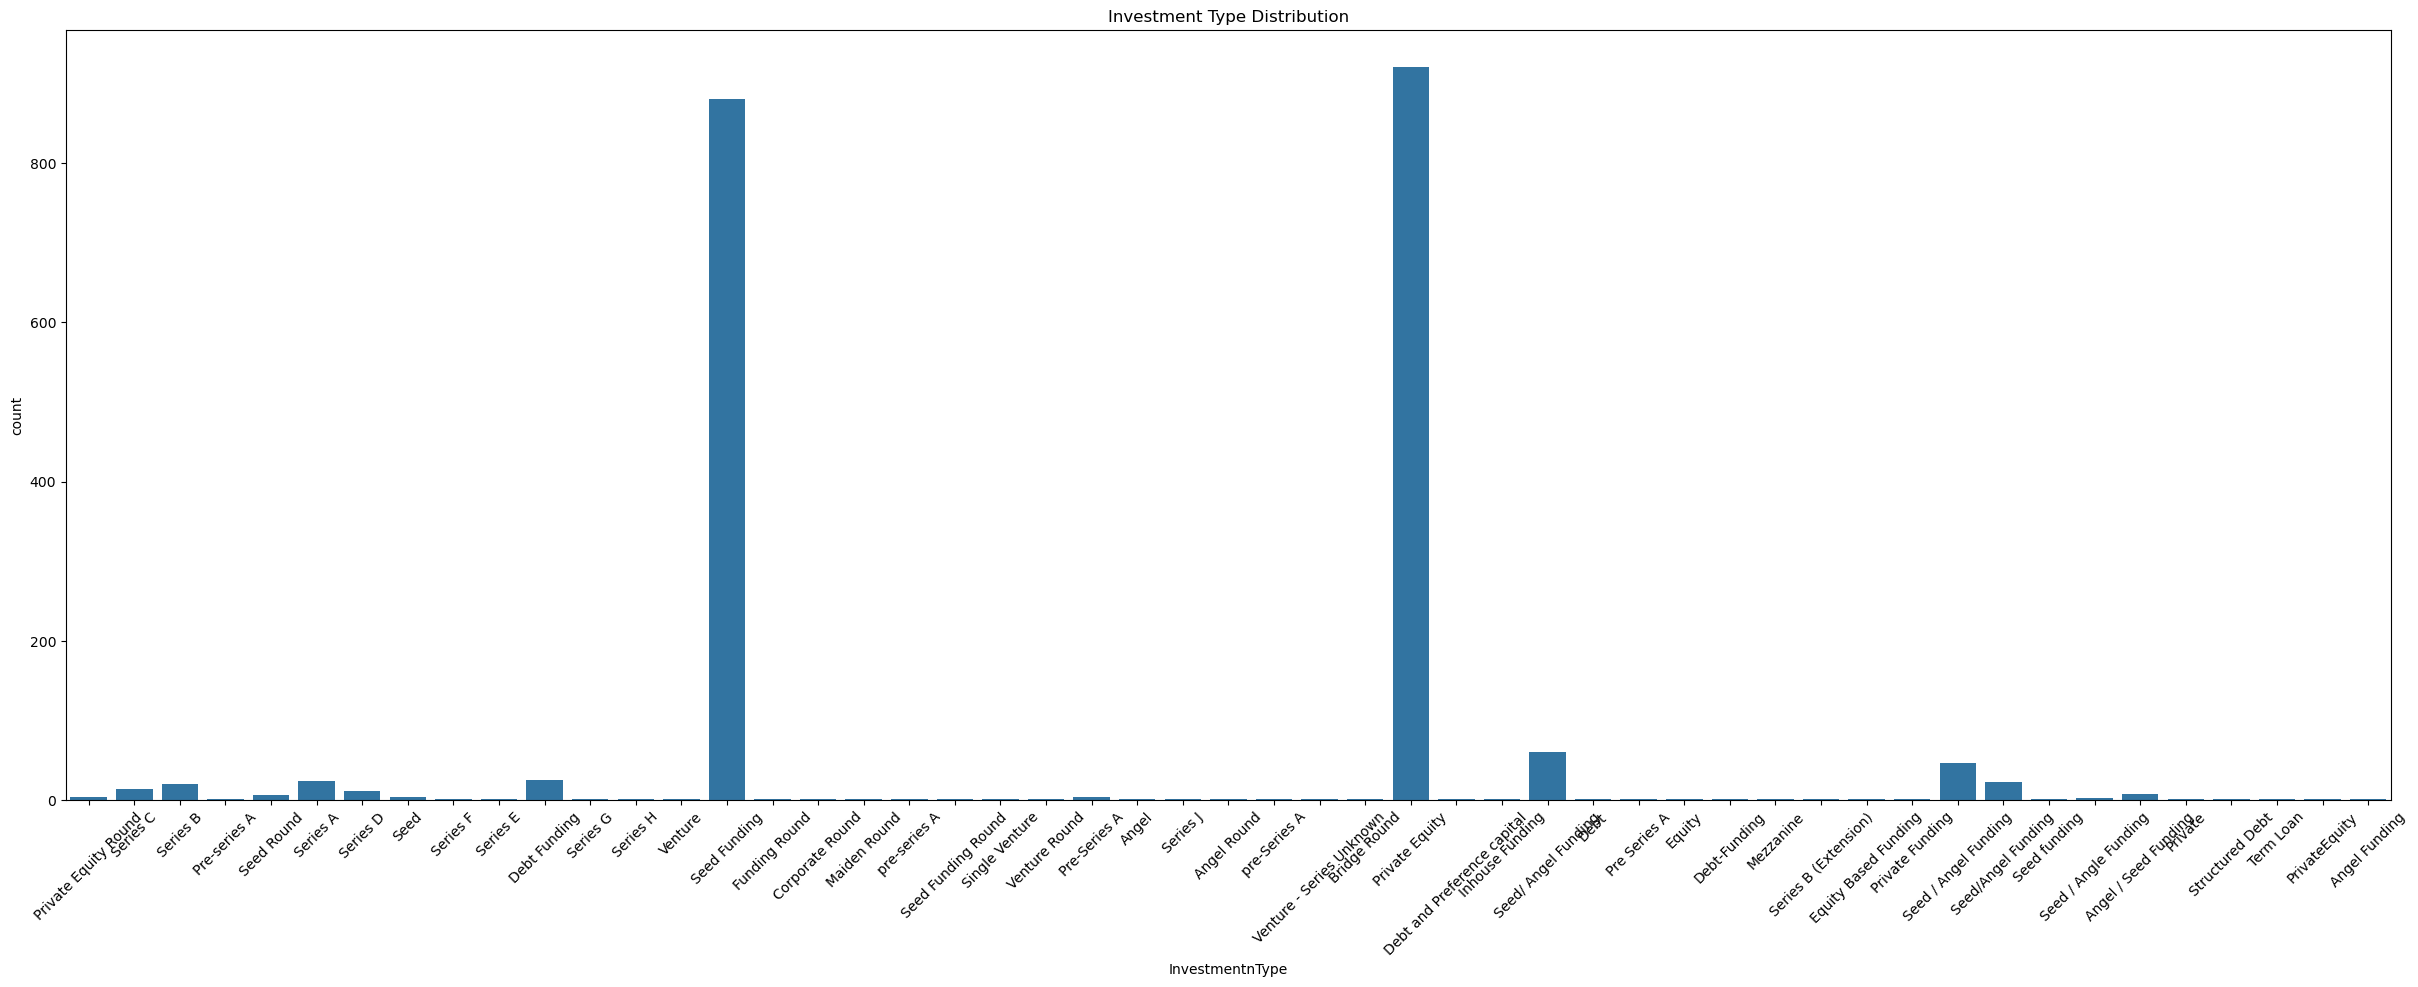

In [62]:
# Investment Type count (using bar chart):

plt.figure(figsize=(30,10))
sns.countplot(data=df, x="InvestmentnType")
plt.xticks(rotation=45)
plt.title("Investment Type Distribution")
plt.show()


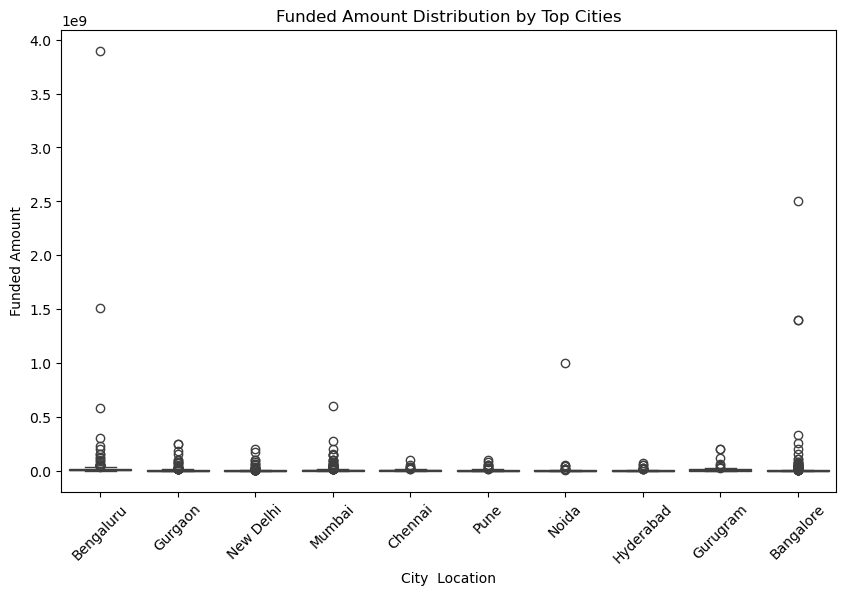

In [65]:
# Funded amount by City(Box Plot):
plt.figure(figsize=(10,6))
top_cities = df["City  Location"].value_counts().nlargest(10).index
sns.boxplot(data=df[df["City  Location"].isin(top_cities)], 
            x="City  Location", y="Funded Amount")
plt.xticks(rotation=45)
plt.title("Funded Amount Distribution by Top Cities")
plt.show()

# selecting features and target:

In [74]:
X = df.drop(columns= ["Funded Amount","Startup Name"]) # startup name is useless so we drop it
Y = df["Funded Amount"]

In [75]:
# handling missing values using fillna command:
X = X.fillna("Unknown")


# defining categorical and numerical columns:

In [76]:

categorical_cols = x.select_dtypes(include="object").columns.tolist()
numeric_cols = []


In [77]:
# Preprocessor: OneHotEncode categorical features + Scale numerical(this preprocessor will be used on ML for properly transform categorical and numrical and numerical features before modeling)
#importing necessary packages:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)

# Train - Test - Split:

In [84]:
# importing necessary packages

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


# Model's:

In [86]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=100)
}

# training and evaluation:

In [87]:
for name, model in models.items():
    pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                               ("model", model)])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(f"\n===== {name} =====")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))


===== Linear Regression =====
MAE: 23437887.737603452
MSE: 3266507840580853.5
R² Score: -0.824104207740262

===== Random Forest =====
MAE: 8907800.47657143
MSE: 1644764448668469.8
R² Score: 0.0815201132276342

===== Gradient Boosting =====
MAE: 12021967.330098186
MSE: 1670174564839866.8
R² Score: 0.067330433579055
